In [ ]:
# https://stackoverflow.com/questions/73255165/library-not-loaded-rpath-libtbb-dylib-in-prophet-python
# import cmdstanpy
# cmdstanpy.install_cmdstan(overwrite=True, compiler=True, dir="/Users/noelthomas/Documents/GitHub/Bridge/nvenv/lib/python3.11/site-packages/prophet")

# sudo ln -s /Users/noelthomas/Documents/GitHub/Bridge/nvenv/lib/python3.11/site-packages/prophet/cmdstan-2.32.2/stan/lib/stan_math/lib/tbb/libtbb.dylib /usr/local/lib/libtbb.dylib

# sudo ln -s /Users/noelthomas/Documents/GitHub/Bridge/nvenv/lib/python3.11/site-packages/prophet/cmdstan-2.32.2/stan/lib/stan_math/lib/tbb/libtbbmalloc.dylib /usr/local/lib/libtbbmalloc.dylib

# sudo ln -s /Users/noelthomas/Documents/GitHub/Bridge/nvenv/lib/python3.11/site-packages/prophet/cmdstan-2.32.2/stan/lib/stan_math/lib/tbb/libtbbmalloc_proxy.dylib /usr/local/lib/libtbbmalloc_proxy.dylib

In [1]:
import pandas as pd
from prophet import Prophet

/Users/noelthomas/Documents/GitHub/Bridge/nvenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


12:25:08 - cmdstanpy - INFO - Chain [1] start processing
12:25:08 - cmdstanpy - INFO - Chain [1] done processing


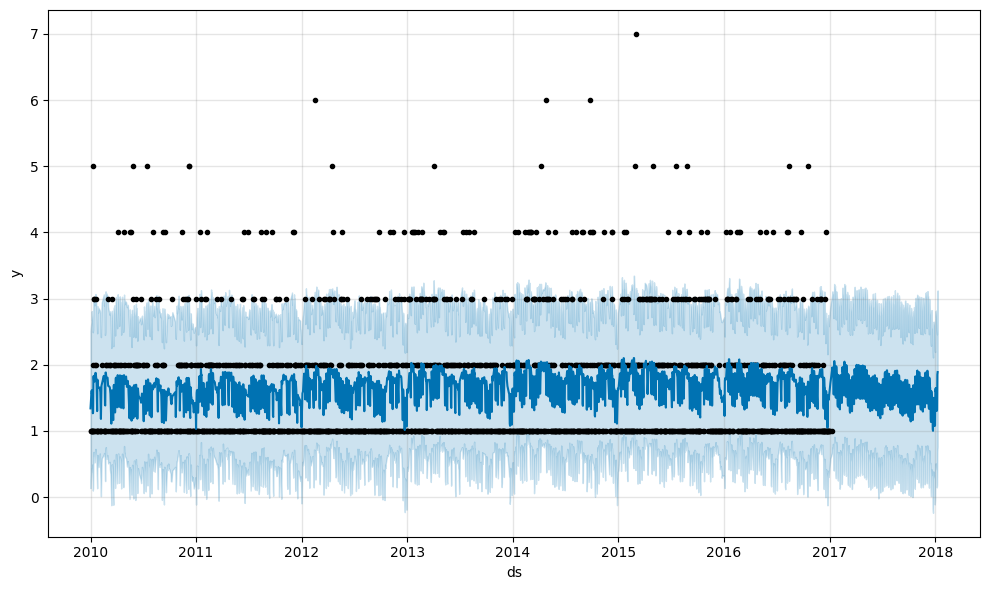

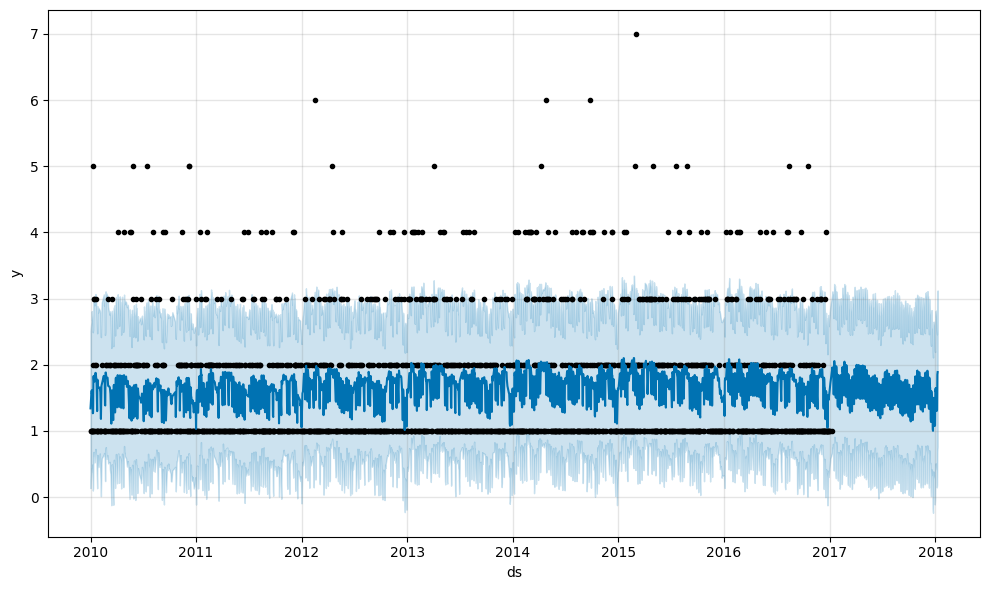

In [3]:
import pandas as pd


# Load your dataset
df = pd.read_csv('../data/oil_pipeline_accidents.csv')

# Convert 'Accident Date/Time' to datetime
df['Accident Date/Time'] = pd.to_datetime(df['Accident Date/Time'])

# Create a new dataframe with the number of accidents per day
daily_accidents = df.groupby(df['Accident Date/Time'].dt.date).size().reset_index()
daily_accidents.columns = ['ds', 'y']

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(daily_accidents)

# Generate future dates
future_dates = model.make_future_dataframe(periods=365)  # forecast for the next year

# Predict the accidents
forecast = model.predict(future_dates)

# Plot the forecast
model.plot(forecast)


In [7]:
df

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,2010-01-01 07:15:00,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,2010-01-04 08:30:00,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,2010-01-05 10:30:00,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,2010-01-06 19:30:00,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,2010-01-07 13:00:00,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,20170015,22020,2016,2016-12-27 08:40:00,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,20170028,22046,2016,2016-12-28 16:20:00,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,20170027,22045,2016,2016-12-29 06:40:00,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,...,NaN,NaN,NaN,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,20170024,22032,2017,2017-01-03 10:00:00,32147,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,11852.0,11.0,0.0,29565.0,0.0,0.0,41428


In [8]:
len(df.columns)

48